In [1]:
cd ..

C:\Users\giaco\thesis-sbp-abm\municipality_level_analysis\municipalities_abm


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import csv

from municipalities_abm.model import SBPAdoption

from municipalities_abm.custom_transformers import (
    TransformCensusFeatures,
    TransformClimateFeatures,
    TransformSoilFeatures,
    )

In [245]:
%matplotlib inline

mpl.rc('axes', labelsize=14)

tick_size = 11
mpl.rc('xtick', labelsize=tick_size)
mpl.rc('ytick', labelsize=tick_size)

In [4]:
# Line necessary to import agents in model, since the cwd of the notebook server is always the base path where you started the 
# server 
import sys
sys.path.append(".\municipalities_abm")

In [5]:
# How to display floats
pd.options.display.float_format = '{:.6f}'.format
#np.set_printoptions(precision=6)
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

In [243]:
# Where to save the figures
PROJECT_ROOT_DIR = "carbon_sequestration"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=False, fig_extension="jpeg", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Real data loading

In [35]:
path_to_adoption_port_real = "./carbon_sequestration/data/SBP yearly adoption - Portugal.csv"
yearly_adoption_portugal_real = pd.read_csv(path_to_adoption_port_real, index_col=0)
yearly_adoption_portugal_real.drop(1995, inplace=True)

# Model runs and data collection

In [36]:
n_runs = 100

In [13]:
def collect_data_run(model, n_run, df):  
    # Aggregate adoption
    aggr_adoption_out = model.datacollector.get_model_vars_dataframe()
    aggr_adoption_out.set_index('Year', inplace=True)
    col_name = 'Run ' + str(n_run+1)
    df[col_name] = aggr_adoption_out['Area sown in the last year [ha/y]']

## Model with payments from 2013 to 2020

In [9]:
start_year = 2013
stop_year = 2021

In [10]:
years = np.arange(start_year, stop_year)

In [11]:
# Set dataframes to collect yearly adoption in Portugal with payments
yearly_adoption_portugal_pred = pd.DataFrame(index=years)
yearly_adoption_portugal_pred.index.rename('Year', inplace=True)

In [14]:
%%time

clsf_folder = "./carbon_sequestration/ml_model/with_pcf/classifier"
regr_folder = "./carbon_sequestration/ml_model/with_pcf/regressor"
for i in range(n_runs):
    model = SBPAdoption(initial_year=start_year, seed=i, ml_clsf_folder=clsf_folder, ml_regr_folder=regr_folder)
    for y in range(start_year, stop_year):
        model.step()
        print("Run n° " + str(i+1) + ": year " + str(y) + " step completed.")
    collect_data_run(model, i, yearly_adoption_portugal_pred)

Negative adoption predicted of: [-0.002996]
Negative adoption predicted of: [-0.001991]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Run n° 1: year 2013 step completed.
Run n° 1: year 2014 step completed.
Negative adoption predicted of: [-0.000199]
Negative adoption predicted of: [-0.000740]
Run n° 1: year 2015 step completed.
Run n° 1: year 2016 step completed.
Run n° 1: year 2017 step completed.
Run n° 1: year 2018 step completed.
Run n° 1: year 2019 step completed.
Run n° 1: year 2020 step completed.
Negative adoption predicted of: [-0.002996]
Negative adoption predicted of: [-0.001991]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative

Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Negative adoption predicted of: [-0.002490]
Run n° 12: year 2013 step completed.
Run n° 12: year 2014 step completed.
Run n° 12: year 2015 step completed.
Run n° 12: year 2016 step completed.
Run n° 12: year 2017 step completed.
Run n° 12: year 2018 step completed.
Run n° 12: year 2019 step completed.
Run n° 12: year 2020 step completed.
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.001831]
Negative adoption predicted of: [-0.001991]
Negative adoption predicted of: [-0.002748]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Run n° 13: year 2013 step completed.
Run n° 13: year 2014 step completed.
Negative adoption predicted of: [-0.000832]
Negative adopt

Run n° 23: year 2015 step completed.
Run n° 23: year 2016 step completed.
Run n° 23: year 2017 step completed.
Run n° 23: year 2018 step completed.
Run n° 23: year 2019 step completed.
Run n° 23: year 2020 step completed.
Negative adoption predicted of: [-0.006985]
Negative adoption predicted of: [-0.002996]
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.002748]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Negative adoption predicted of: [-0.002490]
Run n° 24: year 2013 step completed.
Run n° 24: year 2014 step completed.
Run n° 24: year 2015 step completed.
Run n° 24: year 2016 step completed.
Run n° 24: year 2017 step completed.
Run n° 24: year 2018 step completed.
Run n° 24: year 2019 step co

Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Negative adoption predicted of: [-0.002490]
Run n° 35: year 2013 step completed.
Run n° 35: year 2014 step completed.
Run n° 35: year 2015 step completed.
Run n° 35: year 2016 step completed.
Run n° 35: year 2017 step completed.
Run n° 35: year 2018 step completed.
Run n° 35: year 2019 step completed.
Run n° 35: year 2020 step completed.
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.002490]
Run n° 36: year 2013 step completed.
Run n° 36: year 2014 step completed.
Negative adoption predicted of: [-0.000111]
Run n° 36: yea

Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Run n° 46: year 2013 step completed.
Run n° 46: year 2014 step completed.
Run n° 46: year 2015 step completed.
Run n° 46: year 2016 step completed.
Run n° 46: year 2017 step completed.
Run n° 46: year 2018 step completed.
Run n° 46: year 2019 step completed.
Run n° 46: year 2020 step completed.
Negative adoption predicted of: [-0.002996]
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.005195]
Run n° 47: year 2013 step completed.
Run n° 47: year 2014 step completed.
Run n° 47: year 2015 step completed.
Run n° 47: year 2016 step completed.
Run n° 47: year 2017 step completed.
Run n° 47: year 2018 step completed.
Run n° 47: year 2019 step completed.
Run n

Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Run n° 58: year 2013 step completed.
Run n° 58: year 2014 step completed.
Run n° 58: year 2015 step completed.
Run n° 58: year 2016 step completed.
Run n° 58: year 2017 step completed.
Run n° 58: year 2018 step completed.
Run n° 58: year 2019 step completed.
Run n° 58: year 2020 step completed.
Negative adoption predicted of: [-0.001831]
Negative adoption predicted of: [-0.001991]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Negative adoption predicted of: [-0.002490]
Run n° 59: year 2013 step completed.
Run n° 

Negative adoption predicted of: [-0.002748]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.005195]
Negative adoption predicted of: [-0.002490]
Run n° 70: year 2013 step completed.
Run n° 70: year 2014 step completed.
Negative adoption predicted of: [-0.000496]
Run n° 70: year 2015 step completed.
Run n° 70: year 2016 step completed.
Run n° 70: year 2017 step completed.
Run n° 70: year 2018 step completed.
Run n° 70: year 2019 step completed.
Run n° 70: year 2020 step completed.
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.002490]
Run n° 71: year 2013 step completed.
Run n° 71: year 2014 step completed.
Run n° 71: year 2015 step completed.
Run n° 71: year 2016 

Run n° 81: year 2014 step completed.
Negative adoption predicted of: [-0.001203]
Negative adoption predicted of: [-0.000154]
Run n° 81: year 2015 step completed.
Run n° 81: year 2016 step completed.
Run n° 81: year 2017 step completed.
Run n° 81: year 2018 step completed.
Run n° 81: year 2019 step completed.
Run n° 81: year 2020 step completed.
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.002748]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Run n° 82: year 2013 step completed.
Run n° 82: year 2014 step completed.
Run n° 82: year 2015 step completed.
Run n° 82: year 2016 step completed.
Run n° 82: year 2017 step completed.
Run n° 82: year 2018 step completed.
Run n° 82: year 2019 step completed.
Run n° 82: year 2020 step completed.
Negat

Run n° 93: year 2016 step completed.
Run n° 93: year 2017 step completed.
Run n° 93: year 2018 step completed.
Run n° 93: year 2019 step completed.
Run n° 93: year 2020 step completed.
Negative adoption predicted of: [-0.006985]
Negative adoption predicted of: [-0.002996]
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Run n° 94: year 2013 step completed.
Run n° 94: year 2014 step completed.
Run n° 94: year 2015 step completed.
Run n° 94: year 2016 step completed.
Run n° 94: year 2017 step completed.
Run n° 94: year 2018 step completed.
Run n° 94: year 2019 step completed.
Run n° 94: year 2020 step completed.
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.002748]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0

## Run model without payments from 2009 to 2020

In [80]:
start_year_nop = 2009
stop_year_nop = 2021

In [81]:
years_nop = np.arange(start_year_nop, stop_year_nop)

In [82]:
# Set dataframes to collect yearly adoption in Portugal without payments
yearly_adoption_portugal_pred_nop = pd.DataFrame(index=years_nop)
yearly_adoption_portugal_pred_nop.index.rename('Year', inplace=True)

In [85]:
%%time

clsf_folder = "./carbon_sequestration/ml_model/pre_pcf/classifier"
regr_folder = "./carbon_sequestration/ml_model/pre_pcf/regressor"
for i in range(n_runs):
    model_nop = SBPAdoption(initial_year=start_year_nop, seed=i, ml_clsf_folder=clsf_folder, ml_regr_folder=regr_folder)
    for y in range(start_year_nop, stop_year_nop):
        model_nop.step()
        print("Run n° " + str(i+1) + ": year " + str(y) + " step completed.")
    collect_data_run(model_nop, i, yearly_adoption_portugal_pred_nop)

Run n° 1: year 2009 step completed.
Run n° 1: year 2010 step completed.
Run n° 1: year 2011 step completed.
Run n° 1: year 2012 step completed.
Negative adoption predicted of: [-0.001999]
Negative adoption predicted of: [-0.001724]
Negative adoption predicted of: [-0.001014]
Negative adoption predicted of: [-0.001911]
Negative adoption predicted of: [-0.000383]
Negative adoption predicted of: [-0.001449]
Negative adoption predicted of: [-0.000478]
Negative adoption predicted of: [-0.000895]
Negative adoption predicted of: [-0.001585]
Negative adoption predicted of: [-0.001931]
Negative adoption predicted of: [-0.001541]
Negative adoption predicted of: [-0.000713]
Negative adoption predicted of: [-0.001260]
Negative adoption predicted of: [-0.002140]
Negative adoption predicted of: [-0.000334]
Negative adoption predicted of: [-0.001551]
Negative adoption predicted of: [-0.003793]
Negative adoption predicted of: [-0.003961]
Negative adoption predicted of: [-0.002804]
Run n° 1: year 2013 

Negative adoption predicted of: [-0.001018]
Negative adoption predicted of: [-0.004066]
Negative adoption predicted of: [-0.000443]
Negative adoption predicted of: [-0.002144]
Negative adoption predicted of: [-0.000486]
Negative adoption predicted of: [-0.001278]
Negative adoption predicted of: [-0.003738]
Negative adoption predicted of: [-0.000129]
Run n° 2: year 2015 step completed.
Negative adoption predicted of: [-0.001562]
Negative adoption predicted of: [-0.001808]
Negative adoption predicted of: [-0.003780]
Negative adoption predicted of: [-0.003456]
Negative adoption predicted of: [-0.002265]
Negative adoption predicted of: [-0.003543]
Negative adoption predicted of: [-0.001721]
Negative adoption predicted of: [-0.003182]
Negative adoption predicted of: [-0.002658]
Negative adoption predicted of: [-0.001287]
Negative adoption predicted of: [-0.002371]
Negative adoption predicted of: [-0.004299]
Negative adoption predicted of: [-0.004340]
Negative adoption predicted of: [-0.0030

Negative adoption predicted of: [-0.004443]
Negative adoption predicted of: [-0.000762]
Negative adoption predicted of: [-0.000083]
Negative adoption predicted of: [-0.000651]
Negative adoption predicted of: [-0.001675]
Negative adoption predicted of: [-0.003772]
Run n° 3: year 2017 step completed.
Negative adoption predicted of: [-0.002636]
Negative adoption predicted of: [-0.004652]
Negative adoption predicted of: [-0.005074]
Negative adoption predicted of: [-0.003781]
Negative adoption predicted of: [-0.004236]
Negative adoption predicted of: [-0.001685]
Negative adoption predicted of: [-0.004465]
Negative adoption predicted of: [-0.004882]
Negative adoption predicted of: [-0.005213]
Negative adoption predicted of: [-0.000867]
Negative adoption predicted of: [-0.005297]
Negative adoption predicted of: [-0.000292]
Negative adoption predicted of: [-0.000957]
Negative adoption predicted of: [-0.001504]
Negative adoption predicted of: [-0.000938]
Negative adoption predicted of: [-0.0060

Run n° 4: year 2018 step completed.
Negative adoption predicted of: [-0.003505]
Negative adoption predicted of: [-0.000251]
Negative adoption predicted of: [-0.000123]
Negative adoption predicted of: [-0.004840]
Negative adoption predicted of: [-0.003292]
Negative adoption predicted of: [-0.003707]
Negative adoption predicted of: [-0.003710]
Negative adoption predicted of: [-0.006221]
Negative adoption predicted of: [-0.005053]
Negative adoption predicted of: [-0.004677]
Negative adoption predicted of: [-0.000144]
Negative adoption predicted of: [-0.001160]
Negative adoption predicted of: [-0.001236]
Negative adoption predicted of: [-0.005372]
Negative adoption predicted of: [-0.005431]
Negative adoption predicted of: [-0.009009]
Negative adoption predicted of: [-0.008045]
Negative adoption predicted of: [-0.006708]
Run n° 4: year 2019 step completed.
Negative adoption predicted of: [-0.001401]
Negative adoption predicted of: [-0.001691]
Negative adoption predicted of: [-0.000073]
Nega

Negative adoption predicted of: [-0.000614]
Negative adoption predicted of: [-0.001834]
Negative adoption predicted of: [-0.001357]
Negative adoption predicted of: [-0.001888]
Negative adoption predicted of: [-0.002618]
Negative adoption predicted of: [-0.002653]
Negative adoption predicted of: [-0.001465]
Negative adoption predicted of: [-0.002006]
Negative adoption predicted of: [-0.001722]
Negative adoption predicted of: [-0.001260]
Negative adoption predicted of: [-0.000199]
Negative adoption predicted of: [-0.001342]
Negative adoption predicted of: [-0.002321]
Negative adoption predicted of: [-0.001058]
Run n° 6: year 2013 step completed.
Negative adoption predicted of: [-0.001980]
Negative adoption predicted of: [-0.002271]
Negative adoption predicted of: [-0.001816]
Negative adoption predicted of: [-0.000443]
Negative adoption predicted of: [-0.000235]
Negative adoption predicted of: [-0.001222]
Negative adoption predicted of: [-0.005693]
Run n° 6: year 2014 step completed.
Nega

Negative adoption predicted of: [-0.004656]
Run n° 7: year 2015 step completed.
Negative adoption predicted of: [-0.002183]
Negative adoption predicted of: [-0.004867]
Negative adoption predicted of: [-0.004933]
Negative adoption predicted of: [-0.003103]
Negative adoption predicted of: [-0.000277]
Negative adoption predicted of: [-0.004056]
Negative adoption predicted of: [-0.003866]
Negative adoption predicted of: [-0.001301]
Negative adoption predicted of: [-0.002540]
Negative adoption predicted of: [-0.003246]
Negative adoption predicted of: [-0.006460]
Negative adoption predicted of: [-0.005400]
Negative adoption predicted of: [-0.004870]
Negative adoption predicted of: [-0.000832]
Negative adoption predicted of: [-0.004237]
Negative adoption predicted of: [-0.000547]
Negative adoption predicted of: [-0.000275]
Negative adoption predicted of: [-0.000049]
Negative adoption predicted of: [-0.001552]
Negative adoption predicted of: [-0.000620]
Negative adoption predicted of: [-0.0000

Negative adoption predicted of: [-0.005728]
Negative adoption predicted of: [-0.003947]
Negative adoption predicted of: [-0.007236]
Negative adoption predicted of: [-0.003668]
Negative adoption predicted of: [-0.000018]
Run n° 8: year 2018 step completed.
Negative adoption predicted of: [-0.003036]
Negative adoption predicted of: [-0.002714]
Negative adoption predicted of: [-0.002022]
Negative adoption predicted of: [-0.002951]
Negative adoption predicted of: [-0.002497]
Negative adoption predicted of: [-0.003746]
Negative adoption predicted of: [-0.003072]
Negative adoption predicted of: [-0.005263]
Negative adoption predicted of: [-0.006984]
Negative adoption predicted of: [-0.000824]
Negative adoption predicted of: [-0.008007]
Negative adoption predicted of: [-0.004075]
Negative adoption predicted of: [-0.006254]
Run n° 8: year 2019 step completed.
Negative adoption predicted of: [-0.003608]
Negative adoption predicted of: [-0.000171]
Negative adoption predicted of: [-0.007020]
Nega

Negative adoption predicted of: [-0.000983]
Run n° 9: year 2020 step completed.
Run n° 10: year 2009 step completed.
Run n° 10: year 2010 step completed.
Run n° 10: year 2011 step completed.
Run n° 10: year 2012 step completed.
Negative adoption predicted of: [-0.000089]
Negative adoption predicted of: [-0.000397]
Negative adoption predicted of: [-0.004714]
Negative adoption predicted of: [-0.000044]
Negative adoption predicted of: [-0.002142]
Negative adoption predicted of: [-0.003589]
Negative adoption predicted of: [-0.000543]
Run n° 10: year 2013 step completed.
Negative adoption predicted of: [-0.001668]
Negative adoption predicted of: [-0.000335]
Negative adoption predicted of: [-0.001503]
Negative adoption predicted of: [-0.002270]
Negative adoption predicted of: [-0.004140]
Run n° 10: year 2014 step completed.
Negative adoption predicted of: [-0.002214]
Negative adoption predicted of: [-0.000155]
Negative adoption predicted of: [-0.000894]
Negative adoption predicted of: [-0.00

Negative adoption predicted of: [-0.004882]
Negative adoption predicted of: [-0.000700]
Negative adoption predicted of: [-0.002175]
Negative adoption predicted of: [-0.003221]
Negative adoption predicted of: [-0.000738]
Negative adoption predicted of: [-0.004544]
Negative adoption predicted of: [-0.003943]
Negative adoption predicted of: [-0.004669]
Negative adoption predicted of: [-0.000230]
Negative adoption predicted of: [-0.000870]
Negative adoption predicted of: [-0.000921]
Negative adoption predicted of: [-0.000889]
Negative adoption predicted of: [-0.000779]
Negative adoption predicted of: [-0.004787]
Negative adoption predicted of: [-0.007030]
Negative adoption predicted of: [-0.001260]
Negative adoption predicted of: [-0.003479]
Negative adoption predicted of: [-0.001297]
Negative adoption predicted of: [-0.001881]
Negative adoption predicted of: [-0.001461]
Negative adoption predicted of: [-0.000903]
Negative adoption predicted of: [-0.008036]
Negative adoption predicted of: 

Negative adoption predicted of: [-0.005936]
Negative adoption predicted of: [-0.007828]
Negative adoption predicted of: [-0.004022]
Negative adoption predicted of: [-0.006262]
Negative adoption predicted of: [-0.006469]
Negative adoption predicted of: [-0.007727]
Negative adoption predicted of: [-0.008691]
Negative adoption predicted of: [-0.007361]
Negative adoption predicted of: [-0.001169]
Negative adoption predicted of: [-0.001816]
Negative adoption predicted of: [-0.001806]
Negative adoption predicted of: [-0.001088]
Negative adoption predicted of: [-0.001201]
Negative adoption predicted of: [-0.005096]
Negative adoption predicted of: [-0.000631]
Negative adoption predicted of: [-0.003239]
Negative adoption predicted of: [-0.001337]
Negative adoption predicted of: [-0.002266]
Negative adoption predicted of: [-0.000652]
Negative adoption predicted of: [-0.000562]
Negative adoption predicted of: [-0.001690]
Negative adoption predicted of: [-0.010635]
Negative adoption predicted of: 

Negative adoption predicted of: [-0.009349]
Negative adoption predicted of: [-0.003251]
Negative adoption predicted of: [-0.002021]
Negative adoption predicted of: [-0.001590]
Negative adoption predicted of: [-0.000257]
Run n° 13: year 2020 step completed.
Run n° 14: year 2009 step completed.
Run n° 14: year 2010 step completed.
Run n° 14: year 2011 step completed.
Run n° 14: year 2012 step completed.
Negative adoption predicted of: [-0.000002]
Negative adoption predicted of: [-0.001230]
Negative adoption predicted of: [-0.001276]
Negative adoption predicted of: [-0.002094]
Negative adoption predicted of: [-0.003359]
Negative adoption predicted of: [-0.003270]
Negative adoption predicted of: [-0.000897]
Negative adoption predicted of: [-0.000226]
Negative adoption predicted of: [-0.003180]
Negative adoption predicted of: [-0.002505]
Negative adoption predicted of: [-0.001393]
Negative adoption predicted of: [-0.001362]
Negative adoption predicted of: [-0.003679]
Negative adoption predi

Run n° 15: year 2013 step completed.
Negative adoption predicted of: [-0.000201]
Negative adoption predicted of: [-0.001541]
Negative adoption predicted of: [-0.000340]
Negative adoption predicted of: [-0.001263]
Negative adoption predicted of: [-0.000697]
Negative adoption predicted of: [-0.000126]
Negative adoption predicted of: [-0.004340]
Negative adoption predicted of: [-0.001128]
Negative adoption predicted of: [-0.002933]
Run n° 15: year 2014 step completed.
Negative adoption predicted of: [-0.000514]
Negative adoption predicted of: [-0.000533]
Negative adoption predicted of: [-0.000430]
Negative adoption predicted of: [-0.001590]
Negative adoption predicted of: [-0.000968]
Negative adoption predicted of: [-0.000592]
Negative adoption predicted of: [-0.003879]
Negative adoption predicted of: [-0.005554]
Run n° 15: year 2015 step completed.
Negative adoption predicted of: [-0.002525]
Negative adoption predicted of: [-0.003823]
Negative adoption predicted of: [-0.003071]
Negative 

Negative adoption predicted of: [-0.001450]
Negative adoption predicted of: [-0.000084]
Negative adoption predicted of: [-0.000349]
Negative adoption predicted of: [-0.002497]
Negative adoption predicted of: [-0.004785]
Negative adoption predicted of: [-0.000294]
Negative adoption predicted of: [-0.004146]
Negative adoption predicted of: [-0.005152]
Negative adoption predicted of: [-0.000500]
Run n° 16: year 2016 step completed.
Negative adoption predicted of: [-0.001561]
Negative adoption predicted of: [-0.002745]
Negative adoption predicted of: [-0.002945]
Negative adoption predicted of: [-0.000047]
Negative adoption predicted of: [-0.001538]
Negative adoption predicted of: [-0.003776]
Negative adoption predicted of: [-0.001820]
Negative adoption predicted of: [-0.001006]
Negative adoption predicted of: [-0.002209]
Negative adoption predicted of: [-0.003423]
Negative adoption predicted of: [-0.003838]
Negative adoption predicted of: [-0.000901]
Negative adoption predicted of: [-0.000

Negative adoption predicted of: [-0.005321]
Run n° 17: year 2017 step completed.
Negative adoption predicted of: [-0.001172]
Negative adoption predicted of: [-0.002522]
Negative adoption predicted of: [-0.002604]
Negative adoption predicted of: [-0.001360]
Negative adoption predicted of: [-0.000062]
Negative adoption predicted of: [-0.003737]
Negative adoption predicted of: [-0.003011]
Negative adoption predicted of: [-0.003261]
Negative adoption predicted of: [-0.000487]
Negative adoption predicted of: [-0.001014]
Negative adoption predicted of: [-0.003114]
Negative adoption predicted of: [-0.002545]
Negative adoption predicted of: [-0.000823]
Negative adoption predicted of: [-0.004751]
Negative adoption predicted of: [-0.003898]
Negative adoption predicted of: [-0.006342]
Run n° 17: year 2018 step completed.
Negative adoption predicted of: [-0.004212]
Negative adoption predicted of: [-0.005002]
Negative adoption predicted of: [-0.005100]
Negative adoption predicted of: [-0.005142]
Ne

Negative adoption predicted of: [-0.006824]
Negative adoption predicted of: [-0.000254]
Negative adoption predicted of: [-0.008993]
Negative adoption predicted of: [-0.000431]
Run n° 18: year 2019 step completed.
Negative adoption predicted of: [-0.000895]
Negative adoption predicted of: [-0.004836]
Negative adoption predicted of: [-0.000270]
Negative adoption predicted of: [-0.003977]
Negative adoption predicted of: [-0.000522]
Negative adoption predicted of: [-0.002403]
Negative adoption predicted of: [-0.002749]
Negative adoption predicted of: [-0.004772]
Negative adoption predicted of: [-0.004385]
Negative adoption predicted of: [-0.004762]
Negative adoption predicted of: [-0.001432]
Negative adoption predicted of: [-0.004383]
Negative adoption predicted of: [-0.007647]
Negative adoption predicted of: [-0.001515]
Negative adoption predicted of: [-0.002607]
Negative adoption predicted of: [-0.003142]
Negative adoption predicted of: [-0.001749]
Negative adoption predicted of: [-0.006

Run n° 20: year 2013 step completed.
Run n° 20: year 2014 step completed.
Negative adoption predicted of: [-0.001669]
Negative adoption predicted of: [-0.000243]
Negative adoption predicted of: [-0.000619]
Negative adoption predicted of: [-0.001288]
Negative adoption predicted of: [-0.000198]
Negative adoption predicted of: [-0.001063]
Negative adoption predicted of: [-0.001562]
Negative adoption predicted of: [-0.001882]
Negative adoption predicted of: [-0.000537]
Negative adoption predicted of: [-0.001002]
Negative adoption predicted of: [-0.003562]
Negative adoption predicted of: [-0.005411]
Negative adoption predicted of: [-0.000191]
Negative adoption predicted of: [-0.000119]
Negative adoption predicted of: [-0.002930]
Negative adoption predicted of: [-0.006495]
Negative adoption predicted of: [-0.000366]
Run n° 20: year 2015 step completed.
Negative adoption predicted of: [-0.003271]
Negative adoption predicted of: [-0.002079]
Negative adoption predicted of: [-0.002142]
Negative 

Negative adoption predicted of: [-0.005521]
Negative adoption predicted of: [-0.002004]
Negative adoption predicted of: [-0.004826]
Run n° 21: year 2016 step completed.
Negative adoption predicted of: [-0.000343]
Negative adoption predicted of: [-0.000865]
Negative adoption predicted of: [-0.000981]
Negative adoption predicted of: [-0.000855]
Negative adoption predicted of: [-0.002295]
Negative adoption predicted of: [-0.000149]
Negative adoption predicted of: [-0.000821]
Negative adoption predicted of: [-0.004228]
Negative adoption predicted of: [-0.005547]
Negative adoption predicted of: [-0.005035]
Run n° 21: year 2017 step completed.
Negative adoption predicted of: [-0.006333]
Negative adoption predicted of: [-0.005585]
Negative adoption predicted of: [-0.003702]
Negative adoption predicted of: [-0.002764]
Negative adoption predicted of: [-0.007416]
Negative adoption predicted of: [-0.007962]
Negative adoption predicted of: [-0.007393]
Negative adoption predicted of: [-0.008105]
Ne

Negative adoption predicted of: [-0.000461]
Negative adoption predicted of: [-0.000466]
Negative adoption predicted of: [-0.001662]
Negative adoption predicted of: [-0.001012]
Negative adoption predicted of: [-0.002947]
Negative adoption predicted of: [-0.002239]
Negative adoption predicted of: [-0.006253]
Negative adoption predicted of: [-0.000366]
Negative adoption predicted of: [-0.000722]
Negative adoption predicted of: [-0.004263]
Negative adoption predicted of: [-0.003297]
Negative adoption predicted of: [-0.007061]
Run n° 22: year 2018 step completed.
Negative adoption predicted of: [-0.004323]
Negative adoption predicted of: [-0.004972]
Negative adoption predicted of: [-0.003741]
Negative adoption predicted of: [-0.004454]
Negative adoption predicted of: [-0.001497]
Negative adoption predicted of: [-0.000652]
Negative adoption predicted of: [-0.003356]
Negative adoption predicted of: [-0.003907]
Negative adoption predicted of: [-0.005314]
Negative adoption predicted of: [-0.005

Negative adoption predicted of: [-0.008247]
Negative adoption predicted of: [-0.008158]
Negative adoption predicted of: [-0.005877]
Negative adoption predicted of: [-0.006029]
Negative adoption predicted of: [-0.007513]
Negative adoption predicted of: [-0.007279]
Negative adoption predicted of: [-0.008683]
Negative adoption predicted of: [-0.008689]
Negative adoption predicted of: [-0.007808]
Negative adoption predicted of: [-0.002781]
Negative adoption predicted of: [-0.001596]
Negative adoption predicted of: [-0.001630]
Negative adoption predicted of: [-0.000177]
Negative adoption predicted of: [-0.001959]
Negative adoption predicted of: [-0.009100]
Negative adoption predicted of: [-0.005491]
Negative adoption predicted of: [-0.001891]
Negative adoption predicted of: [-0.001614]
Negative adoption predicted of: [-0.002667]
Negative adoption predicted of: [-0.005143]
Negative adoption predicted of: [-0.002142]
Negative adoption predicted of: [-0.001056]
Negative adoption predicted of: 

Negative adoption predicted of: [-0.004558]
Negative adoption predicted of: [-0.006886]
Negative adoption predicted of: [-0.003425]
Negative adoption predicted of: [-0.007833]
Negative adoption predicted of: [-0.006681]
Run n° 24: year 2020 step completed.
Run n° 25: year 2009 step completed.
Run n° 25: year 2010 step completed.
Run n° 25: year 2011 step completed.
Run n° 25: year 2012 step completed.
Negative adoption predicted of: [-0.002752]
Negative adoption predicted of: [-0.001581]
Negative adoption predicted of: [-0.001924]
Negative adoption predicted of: [-0.001375]
Negative adoption predicted of: [-0.004077]
Negative adoption predicted of: [-0.001946]
Negative adoption predicted of: [-0.000562]
Negative adoption predicted of: [-0.000835]
Negative adoption predicted of: [-0.003871]
Negative adoption predicted of: [-0.000100]
Negative adoption predicted of: [-0.000008]
Negative adoption predicted of: [-0.002671]
Negative adoption predicted of: [-0.006395]
Negative adoption predi

Negative adoption predicted of: [-0.003523]
Negative adoption predicted of: [-0.000042]
Negative adoption predicted of: [-0.001260]
Negative adoption predicted of: [-0.006072]
Run n° 26: year 2015 step completed.
Negative adoption predicted of: [-0.001474]
Negative adoption predicted of: [-0.003353]
Negative adoption predicted of: [-0.002413]
Negative adoption predicted of: [-0.003756]
Negative adoption predicted of: [-0.000055]
Negative adoption predicted of: [-0.001697]
Negative adoption predicted of: [-0.001525]
Negative adoption predicted of: [-0.001816]
Negative adoption predicted of: [-0.001019]
Negative adoption predicted of: [-0.003810]
Negative adoption predicted of: [-0.003927]
Negative adoption predicted of: [-0.002585]
Negative adoption predicted of: [-0.002508]
Negative adoption predicted of: [-0.005238]
Negative adoption predicted of: [-0.000727]
Negative adoption predicted of: [-0.007275]
Negative adoption predicted of: [-0.006740]
Negative adoption predicted of: [-0.000

Negative adoption predicted of: [-0.000359]
Negative adoption predicted of: [-0.007446]
Negative adoption predicted of: [-0.002130]
Negative adoption predicted of: [-0.004685]
Negative adoption predicted of: [-0.002251]
Negative adoption predicted of: [-0.003058]
Negative adoption predicted of: [-0.000137]
Negative adoption predicted of: [-0.005059]
Negative adoption predicted of: [-0.008525]
Negative adoption predicted of: [-0.008165]
Negative adoption predicted of: [-0.006954]
Run n° 27: year 2018 step completed.
Negative adoption predicted of: [-0.003550]
Negative adoption predicted of: [-0.003127]
Negative adoption predicted of: [-0.000305]
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.001970]
Negative adoption predicted of: [-0.002360]
Negative adoption predicted of: [-0.000902]
Negative adoption predicted of: [-0.004929]
Negative adoption predicted of: [-0.003735]
Negative adoption predicted of: [-0.000127]
Negative adoption predicted of: [-0.000

Negative adoption predicted of: [-0.000557]
Run n° 28: year 2020 step completed.
Run n° 29: year 2009 step completed.
Run n° 29: year 2010 step completed.
Run n° 29: year 2011 step completed.
Run n° 29: year 2012 step completed.
Negative adoption predicted of: [-0.000433]
Negative adoption predicted of: [-0.002033]
Negative adoption predicted of: [-0.004811]
Negative adoption predicted of: [-0.000982]
Negative adoption predicted of: [-0.001635]
Negative adoption predicted of: [-0.001524]
Negative adoption predicted of: [-0.000209]
Negative adoption predicted of: [-0.001819]
Negative adoption predicted of: [-0.000376]
Negative adoption predicted of: [-0.001543]
Negative adoption predicted of: [-0.001355]
Negative adoption predicted of: [-0.002954]
Negative adoption predicted of: [-0.002217]
Negative adoption predicted of: [-0.000671]
Negative adoption predicted of: [-0.000766]
Negative adoption predicted of: [-0.000210]
Negative adoption predicted of: [-0.000894]
Negative adoption predi

Negative adoption predicted of: [-0.000763]
Run n° 30: year 2015 step completed.
Negative adoption predicted of: [-0.002463]
Negative adoption predicted of: [-0.002072]
Negative adoption predicted of: [-0.000079]
Negative adoption predicted of: [-0.000963]
Negative adoption predicted of: [-0.000111]
Negative adoption predicted of: [-0.000666]
Negative adoption predicted of: [-0.000812]
Negative adoption predicted of: [-0.000839]
Negative adoption predicted of: [-0.002429]
Negative adoption predicted of: [-0.002605]
Negative adoption predicted of: [-0.000694]
Negative adoption predicted of: [-0.002559]
Negative adoption predicted of: [-0.005418]
Negative adoption predicted of: [-0.007298]
Negative adoption predicted of: [-0.000009]
Negative adoption predicted of: [-0.000489]
Run n° 30: year 2016 step completed.
Negative adoption predicted of: [-0.000920]
Negative adoption predicted of: [-0.003274]
Negative adoption predicted of: [-0.002460]
Negative adoption predicted of: [-0.005676]
Ne

Negative adoption predicted of: [-0.000449]
Negative adoption predicted of: [-0.000400]
Run n° 31: year 2015 step completed.
Negative adoption predicted of: [-0.000072]
Negative adoption predicted of: [-0.003364]
Negative adoption predicted of: [-0.002602]
Negative adoption predicted of: [-0.004083]
Negative adoption predicted of: [-0.002944]
Run n° 31: year 2016 step completed.
Negative adoption predicted of: [-0.002692]
Negative adoption predicted of: [-0.004958]
Negative adoption predicted of: [-0.000323]
Negative adoption predicted of: [-0.005991]
Negative adoption predicted of: [-0.007251]
Negative adoption predicted of: [-0.008200]
Negative adoption predicted of: [-0.006707]
Negative adoption predicted of: [-0.008054]
Negative adoption predicted of: [-0.005067]
Negative adoption predicted of: [-0.004558]
Negative adoption predicted of: [-0.002428]
Negative adoption predicted of: [-0.008058]
Negative adoption predicted of: [-0.006030]
Negative adoption predicted of: [-0.005567]
Ne

Negative adoption predicted of: [-0.003321]
Negative adoption predicted of: [-0.004816]
Negative adoption predicted of: [-0.000457]
Negative adoption predicted of: [-0.002894]
Negative adoption predicted of: [-0.000388]
Negative adoption predicted of: [-0.004985]
Negative adoption predicted of: [-0.005634]
Negative adoption predicted of: [-0.004452]
Negative adoption predicted of: [-0.004324]
Negative adoption predicted of: [-0.000360]
Negative adoption predicted of: [-0.000010]
Negative adoption predicted of: [-0.000812]
Negative adoption predicted of: [-0.007565]
Negative adoption predicted of: [-0.001756]
Negative adoption predicted of: [-0.002620]
Negative adoption predicted of: [-0.000488]
Negative adoption predicted of: [-0.001190]
Negative adoption predicted of: [-0.000477]
Negative adoption predicted of: [-0.001387]
Negative adoption predicted of: [-0.003858]
Negative adoption predicted of: [-0.005234]
Negative adoption predicted of: [-0.000640]
Negative adoption predicted of: 

Negative adoption predicted of: [-0.000103]
Negative adoption predicted of: [-0.007757]
Negative adoption predicted of: [-0.007253]
Negative adoption predicted of: [-0.008181]
Run n° 33: year 2019 step completed.
Negative adoption predicted of: [-0.002883]
Negative adoption predicted of: [-0.005644]
Negative adoption predicted of: [-0.003972]
Negative adoption predicted of: [-0.003487]
Negative adoption predicted of: [-0.004537]
Negative adoption predicted of: [-0.001539]
Negative adoption predicted of: [-0.003431]
Negative adoption predicted of: [-0.005759]
Negative adoption predicted of: [-0.005502]
Negative adoption predicted of: [-0.007676]
Negative adoption predicted of: [-0.008088]
Negative adoption predicted of: [-0.000467]
Negative adoption predicted of: [-0.001367]
Negative adoption predicted of: [-0.002181]
Negative adoption predicted of: [-0.001724]
Negative adoption predicted of: [-0.004727]
Negative adoption predicted of: [-0.003754]
Negative adoption predicted of: [-0.006

Negative adoption predicted of: [-0.001347]
Negative adoption predicted of: [-0.001893]
Negative adoption predicted of: [-0.003466]
Negative adoption predicted of: [-0.005189]
Negative adoption predicted of: [-0.001358]
Negative adoption predicted of: [-0.006913]
Negative adoption predicted of: [-0.010247]
Negative adoption predicted of: [-0.010081]
Negative adoption predicted of: [-0.002538]
Negative adoption predicted of: [-0.000548]
Negative adoption predicted of: [-0.008644]
Negative adoption predicted of: [-0.000039]
Negative adoption predicted of: [-0.001298]
Run n° 34: year 2020 step completed.
Run n° 35: year 2009 step completed.
Run n° 35: year 2010 step completed.
Run n° 35: year 2011 step completed.
Run n° 35: year 2012 step completed.
Negative adoption predicted of: [-0.000458]
Negative adoption predicted of: [-0.002694]
Negative adoption predicted of: [-0.000855]
Negative adoption predicted of: [-0.002085]
Negative adoption predicted of: [-0.002540]
Negative adoption predi

Negative adoption predicted of: [-0.000468]
Negative adoption predicted of: [-0.002186]
Negative adoption predicted of: [-0.000290]
Negative adoption predicted of: [-0.001152]
Negative adoption predicted of: [-0.002399]
Negative adoption predicted of: [-0.002168]
Negative adoption predicted of: [-0.000320]
Negative adoption predicted of: [-0.000147]
Negative adoption predicted of: [-0.000037]
Negative adoption predicted of: [-0.001764]
Negative adoption predicted of: [-0.003608]
Negative adoption predicted of: [-0.002844]
Negative adoption predicted of: [-0.002298]
Negative adoption predicted of: [-0.007039]
Run n° 36: year 2013 step completed.
Negative adoption predicted of: [-0.000343]
Negative adoption predicted of: [-0.001254]
Negative adoption predicted of: [-0.001435]
Negative adoption predicted of: [-0.001067]
Negative adoption predicted of: [-0.003341]
Negative adoption predicted of: [-0.002827]
Negative adoption predicted of: [-0.001082]
Negative adoption predicted of: [-0.001

Negative adoption predicted of: [-0.001342]
Negative adoption predicted of: [-0.001260]
Negative adoption predicted of: [-0.000850]
Negative adoption predicted of: [-0.001803]
Negative adoption predicted of: [-0.003627]
Negative adoption predicted of: [-0.002379]
Negative adoption predicted of: [-0.001635]
Negative adoption predicted of: [-0.000472]
Negative adoption predicted of: [-0.000050]
Negative adoption predicted of: [-0.000161]
Negative adoption predicted of: [-0.003737]
Negative adoption predicted of: [-0.006289]
Negative adoption predicted of: [-0.006123]
Run n° 37: year 2015 step completed.
Negative adoption predicted of: [-0.000565]
Negative adoption predicted of: [-0.001518]
Negative adoption predicted of: [-0.001262]
Negative adoption predicted of: [-0.000051]
Negative adoption predicted of: [-0.000829]
Negative adoption predicted of: [-0.001227]
Negative adoption predicted of: [-0.000735]
Negative adoption predicted of: [-0.003404]
Negative adoption predicted of: [-0.002

Negative adoption predicted of: [-0.006432]
Negative adoption predicted of: [-0.006829]
Negative adoption predicted of: [-0.000234]
Run n° 38: year 2016 step completed.
Negative adoption predicted of: [-0.001081]
Negative adoption predicted of: [-0.001564]
Negative adoption predicted of: [-0.000154]
Negative adoption predicted of: [-0.000309]
Negative adoption predicted of: [-0.002218]
Negative adoption predicted of: [-0.002476]
Negative adoption predicted of: [-0.000990]
Negative adoption predicted of: [-0.001427]
Negative adoption predicted of: [-0.000328]
Negative adoption predicted of: [-0.003967]
Negative adoption predicted of: [-0.002826]
Negative adoption predicted of: [-0.003698]
Negative adoption predicted of: [-0.003055]
Negative adoption predicted of: [-0.006552]
Negative adoption predicted of: [-0.005974]
Negative adoption predicted of: [-0.005836]
Run n° 38: year 2017 step completed.
Negative adoption predicted of: [-0.000739]
Negative adoption predicted of: [-0.001524]
Ne

Negative adoption predicted of: [-0.000014]
Negative adoption predicted of: [-0.001125]
Negative adoption predicted of: [-0.006350]
Negative adoption predicted of: [-0.007325]
Negative adoption predicted of: [-0.000499]
Negative adoption predicted of: [-0.002512]
Negative adoption predicted of: [-0.001961]
Negative adoption predicted of: [-0.000467]
Negative adoption predicted of: [-0.003693]
Negative adoption predicted of: [-0.000220]
Negative adoption predicted of: [-0.004231]
Negative adoption predicted of: [-0.006419]
Negative adoption predicted of: [-0.000599]
Negative adoption predicted of: [-0.000069]
Run n° 39: year 2019 step completed.
Negative adoption predicted of: [-0.000246]
Negative adoption predicted of: [-0.004459]
Negative adoption predicted of: [-0.004331]
Negative adoption predicted of: [-0.004215]
Negative adoption predicted of: [-0.002397]
Negative adoption predicted of: [-0.003923]
Negative adoption predicted of: [-0.002812]
Negative adoption predicted of: [-0.002

Negative adoption predicted of: [-0.000168]
Negative adoption predicted of: [-0.000467]
Negative adoption predicted of: [-0.001482]
Run n° 40: year 2020 step completed.
Run n° 41: year 2009 step completed.
Run n° 41: year 2010 step completed.
Run n° 41: year 2011 step completed.
Run n° 41: year 2012 step completed.
Negative adoption predicted of: [-0.002343]
Negative adoption predicted of: [-0.003725]
Negative adoption predicted of: [-0.003669]
Negative adoption predicted of: [-0.002718]
Negative adoption predicted of: [-0.001176]
Negative adoption predicted of: [-0.002104]
Negative adoption predicted of: [-0.002424]
Negative adoption predicted of: [-0.003147]
Negative adoption predicted of: [-0.002386]
Negative adoption predicted of: [-0.003147]
Negative adoption predicted of: [-0.000567]
Negative adoption predicted of: [-0.003739]
Negative adoption predicted of: [-0.000015]
Negative adoption predicted of: [-0.000991]
Negative adoption predicted of: [-0.001857]
Negative adoption predi

Negative adoption predicted of: [-0.001986]
Negative adoption predicted of: [-0.002386]
Negative adoption predicted of: [-0.002595]
Negative adoption predicted of: [-0.005110]
Negative adoption predicted of: [-0.005181]
Run n° 42: year 2014 step completed.
Negative adoption predicted of: [-0.001922]
Negative adoption predicted of: [-0.003397]
Negative adoption predicted of: [-0.000144]
Negative adoption predicted of: [-0.000132]
Negative adoption predicted of: [-0.001097]
Negative adoption predicted of: [-0.001027]
Negative adoption predicted of: [-0.002289]
Negative adoption predicted of: [-0.003136]
Negative adoption predicted of: [-0.001694]
Negative adoption predicted of: [-0.001236]
Negative adoption predicted of: [-0.002802]
Negative adoption predicted of: [-0.005569]
Negative adoption predicted of: [-0.000706]
Negative adoption predicted of: [-0.002175]
Negative adoption predicted of: [-0.003702]
Negative adoption predicted of: [-0.003655]
Negative adoption predicted of: [-0.006

Negative adoption predicted of: [-0.002912]
Negative adoption predicted of: [-0.007244]
Negative adoption predicted of: [-0.006581]
Negative adoption predicted of: [-0.007539]
Run n° 44: year 2019 step completed.
Negative adoption predicted of: [-0.002565]
Negative adoption predicted of: [-0.006966]
Negative adoption predicted of: [-0.007069]
Negative adoption predicted of: [-0.006963]
Negative adoption predicted of: [-0.003411]
Negative adoption predicted of: [-0.007459]
Negative adoption predicted of: [-0.005270]
Negative adoption predicted of: [-0.005003]
Negative adoption predicted of: [-0.007680]
Negative adoption predicted of: [-0.007917]
Negative adoption predicted of: [-0.004023]
Negative adoption predicted of: [-0.007402]
Negative adoption predicted of: [-0.007138]
Negative adoption predicted of: [-0.000682]
Negative adoption predicted of: [-0.000173]
Negative adoption predicted of: [-0.001958]
Negative adoption predicted of: [-0.000195]
Negative adoption predicted of: [-0.002

Negative adoption predicted of: [-0.000965]
Negative adoption predicted of: [-0.000735]
Negative adoption predicted of: [-0.001090]
Negative adoption predicted of: [-0.000689]
Negative adoption predicted of: [-0.000305]
Negative adoption predicted of: [-0.001659]
Negative adoption predicted of: [-0.000812]
Negative adoption predicted of: [-0.004006]
Negative adoption predicted of: [-0.001722]
Negative adoption predicted of: [-0.004021]
Negative adoption predicted of: [-0.000377]
Negative adoption predicted of: [-0.000622]
Run n° 46: year 2013 step completed.
Negative adoption predicted of: [-0.000507]
Negative adoption predicted of: [-0.001289]
Negative adoption predicted of: [-0.002970]
Negative adoption predicted of: [-0.001605]
Negative adoption predicted of: [-0.001023]
Negative adoption predicted of: [-0.002344]
Negative adoption predicted of: [-0.000958]
Negative adoption predicted of: [-0.005068]
Negative adoption predicted of: [-0.001104]
Run n° 46: year 2014 step completed.
Ne

Run n° 47: year 2016 step completed.
Negative adoption predicted of: [-0.003121]
Negative adoption predicted of: [-0.002830]
Negative adoption predicted of: [-0.001107]
Negative adoption predicted of: [-0.002030]
Negative adoption predicted of: [-0.000732]
Negative adoption predicted of: [-0.001982]
Negative adoption predicted of: [-0.000458]
Negative adoption predicted of: [-0.001514]
Negative adoption predicted of: [-0.003524]
Negative adoption predicted of: [-0.002954]
Negative adoption predicted of: [-0.000640]
Negative adoption predicted of: [-0.004776]
Negative adoption predicted of: [-0.000599]
Negative adoption predicted of: [-0.005424]
Run n° 47: year 2017 step completed.
Negative adoption predicted of: [-0.000078]
Negative adoption predicted of: [-0.004056]
Negative adoption predicted of: [-0.003132]
Negative adoption predicted of: [-0.000010]
Negative adoption predicted of: [-0.002838]
Negative adoption predicted of: [-0.001603]
Negative adoption predicted of: [-0.000447]
Ne

Negative adoption predicted of: [-0.001518]
Negative adoption predicted of: [-0.000835]
Negative adoption predicted of: [-0.000309]
Negative adoption predicted of: [-0.000029]
Negative adoption predicted of: [-0.000638]
Negative adoption predicted of: [-0.007787]
Negative adoption predicted of: [-0.001728]
Negative adoption predicted of: [-0.008386]
Negative adoption predicted of: [-0.000317]
Negative adoption predicted of: [-0.000381]
Run n° 48: year 2018 step completed.
Negative adoption predicted of: [-0.003404]
Negative adoption predicted of: [-0.002549]
Negative adoption predicted of: [-0.003062]
Negative adoption predicted of: [-0.002073]
Negative adoption predicted of: [-0.002651]
Negative adoption predicted of: [-0.005063]
Negative adoption predicted of: [-0.003243]
Negative adoption predicted of: [-0.004041]
Negative adoption predicted of: [-0.004481]
Negative adoption predicted of: [-0.003996]
Negative adoption predicted of: [-0.007111]
Negative adoption predicted of: [-0.000

Negative adoption predicted of: [-0.006659]
Negative adoption predicted of: [-0.001246]
Negative adoption predicted of: [-0.000880]
Negative adoption predicted of: [-0.000261]
Negative adoption predicted of: [-0.003229]
Negative adoption predicted of: [-0.003365]
Negative adoption predicted of: [-0.006828]
Negative adoption predicted of: [-0.003965]
Negative adoption predicted of: [-0.005579]
Negative adoption predicted of: [-0.000409]
Negative adoption predicted of: [-0.000423]
Negative adoption predicted of: [-0.007667]
Run n° 49: year 2020 step completed.
Run n° 50: year 2009 step completed.
Run n° 50: year 2010 step completed.
Run n° 50: year 2011 step completed.
Run n° 50: year 2012 step completed.
Negative adoption predicted of: [-0.001486]
Negative adoption predicted of: [-0.000629]
Negative adoption predicted of: [-0.001561]
Negative adoption predicted of: [-0.000014]
Negative adoption predicted of: [-0.000567]
Negative adoption predicted of: [-0.000151]
Negative adoption predi

Run n° 51: year 2011 step completed.
Run n° 51: year 2012 step completed.
Negative adoption predicted of: [-0.001213]
Negative adoption predicted of: [-0.001310]
Negative adoption predicted of: [-0.002322]
Negative adoption predicted of: [-0.001284]
Negative adoption predicted of: [-0.002327]
Negative adoption predicted of: [-0.002278]
Negative adoption predicted of: [-0.003126]
Negative adoption predicted of: [-0.001174]
Negative adoption predicted of: [-0.001663]
Negative adoption predicted of: [-0.002184]
Negative adoption predicted of: [-0.000198]
Negative adoption predicted of: [-0.000259]
Negative adoption predicted of: [-0.000108]
Negative adoption predicted of: [-0.006638]
Negative adoption predicted of: [-0.000464]
Run n° 51: year 2013 step completed.
Negative adoption predicted of: [-0.000926]
Negative adoption predicted of: [-0.000747]
Negative adoption predicted of: [-0.000807]
Negative adoption predicted of: [-0.000969]
Negative adoption predicted of: [-0.000626]
Negative 

Run n° 52: year 2014 step completed.
Negative adoption predicted of: [-0.001619]
Negative adoption predicted of: [-0.003296]
Negative adoption predicted of: [-0.001664]
Negative adoption predicted of: [-0.001368]
Negative adoption predicted of: [-0.000995]
Negative adoption predicted of: [-0.001038]
Negative adoption predicted of: [-0.002706]
Negative adoption predicted of: [-0.001450]
Negative adoption predicted of: [-0.000829]
Negative adoption predicted of: [-0.003983]
Negative adoption predicted of: [-0.002366]
Run n° 52: year 2015 step completed.
Negative adoption predicted of: [-0.001802]
Negative adoption predicted of: [-0.003483]
Negative adoption predicted of: [-0.002878]
Negative adoption predicted of: [-0.000664]
Negative adoption predicted of: [-0.001657]
Negative adoption predicted of: [-0.004054]
Negative adoption predicted of: [-0.003078]
Negative adoption predicted of: [-0.001775]
Negative adoption predicted of: [-0.000390]
Negative adoption predicted of: [-0.001260]
Ne

Negative adoption predicted of: [-0.001883]
Negative adoption predicted of: [-0.001691]
Negative adoption predicted of: [-0.002819]
Negative adoption predicted of: [-0.002461]
Negative adoption predicted of: [-0.004483]
Negative adoption predicted of: [-0.004510]
Negative adoption predicted of: [-0.003941]
Negative adoption predicted of: [-0.000177]
Negative adoption predicted of: [-0.006159]
Negative adoption predicted of: [-0.001243]
Negative adoption predicted of: [-0.000952]
Negative adoption predicted of: [-0.000457]
Negative adoption predicted of: [-0.001330]
Negative adoption predicted of: [-0.005080]
Negative adoption predicted of: [-0.008090]
Negative adoption predicted of: [-0.000474]
Run n° 53: year 2018 step completed.
Negative adoption predicted of: [-0.003532]
Negative adoption predicted of: [-0.001555]
Negative adoption predicted of: [-0.001276]
Negative adoption predicted of: [-0.001268]
Negative adoption predicted of: [-0.000450]
Negative adoption predicted of: [-0.003

Run n° 54: year 2019 step completed.
Negative adoption predicted of: [-0.003828]
Negative adoption predicted of: [-0.004051]
Negative adoption predicted of: [-0.003549]
Negative adoption predicted of: [-0.003262]
Negative adoption predicted of: [-0.001440]
Negative adoption predicted of: [-0.002533]
Negative adoption predicted of: [-0.003629]
Negative adoption predicted of: [-0.002622]
Negative adoption predicted of: [-0.004519]
Negative adoption predicted of: [-0.002396]
Negative adoption predicted of: [-0.004462]
Negative adoption predicted of: [-0.000888]
Negative adoption predicted of: [-0.001126]
Negative adoption predicted of: [-0.003911]
Negative adoption predicted of: [-0.004691]
Negative adoption predicted of: [-0.008800]
Negative adoption predicted of: [-0.007212]
Negative adoption predicted of: [-0.000196]
Run n° 54: year 2020 step completed.
Run n° 55: year 2009 step completed.
Run n° 55: year 2010 step completed.
Run n° 55: year 2011 step completed.
Run n° 55: year 2012 st

Run n° 56: year 2014 step completed.
Negative adoption predicted of: [-0.001255]
Negative adoption predicted of: [-0.003178]
Negative adoption predicted of: [-0.001377]
Negative adoption predicted of: [-0.001076]
Negative adoption predicted of: [-0.001176]
Negative adoption predicted of: [-0.000032]
Negative adoption predicted of: [-0.000386]
Negative adoption predicted of: [-0.000231]
Negative adoption predicted of: [-0.001160]
Negative adoption predicted of: [-0.002307]
Negative adoption predicted of: [-0.001078]
Negative adoption predicted of: [-0.001571]
Negative adoption predicted of: [-0.005287]
Negative adoption predicted of: [-0.005161]
Negative adoption predicted of: [-0.005842]
Negative adoption predicted of: [-0.000832]
Negative adoption predicted of: [-0.000066]
Run n° 56: year 2015 step completed.
Negative adoption predicted of: [-0.001139]
Negative adoption predicted of: [-0.002275]
Negative adoption predicted of: [-0.003579]
Negative adoption predicted of: [-0.002537]
Ne

Negative adoption predicted of: [-0.004768]
Negative adoption predicted of: [-0.006532]
Negative adoption predicted of: [-0.002374]
Negative adoption predicted of: [-0.000123]
Negative adoption predicted of: [-0.004267]
Negative adoption predicted of: [-0.006229]
Run n° 57: year 2016 step completed.
Negative adoption predicted of: [-0.000992]
Negative adoption predicted of: [-0.001413]
Negative adoption predicted of: [-0.002745]
Negative adoption predicted of: [-0.000127]
Negative adoption predicted of: [-0.000612]
Negative adoption predicted of: [-0.003852]
Negative adoption predicted of: [-0.002892]
Negative adoption predicted of: [-0.003348]
Negative adoption predicted of: [-0.002635]
Negative adoption predicted of: [-0.003455]
Negative adoption predicted of: [-0.007523]
Negative adoption predicted of: [-0.005733]
Negative adoption predicted of: [-0.007358]
Run n° 57: year 2017 step completed.
Negative adoption predicted of: [-0.000902]
Negative adoption predicted of: [-0.003468]
Ne

Negative adoption predicted of: [-0.000795]
Run n° 58: year 2018 step completed.
Negative adoption predicted of: [-0.002545]
Negative adoption predicted of: [-0.000590]
Negative adoption predicted of: [-0.001479]
Negative adoption predicted of: [-0.001213]
Negative adoption predicted of: [-0.000378]
Negative adoption predicted of: [-0.000826]
Negative adoption predicted of: [-0.002553]
Negative adoption predicted of: [-0.004125]
Negative adoption predicted of: [-0.002948]
Negative adoption predicted of: [-0.003542]
Negative adoption predicted of: [-0.000606]
Negative adoption predicted of: [-0.002881]
Negative adoption predicted of: [-0.000034]
Negative adoption predicted of: [-0.005574]
Negative adoption predicted of: [-0.007205]
Negative adoption predicted of: [-0.005416]
Run n° 58: year 2019 step completed.
Negative adoption predicted of: [-0.006539]
Negative adoption predicted of: [-0.005767]
Negative adoption predicted of: [-0.000251]
Negative adoption predicted of: [-0.000766]
Ne

Negative adoption predicted of: [-0.000534]
Negative adoption predicted of: [-0.000467]
Negative adoption predicted of: [-0.001618]
Negative adoption predicted of: [-0.006781]
Negative adoption predicted of: [-0.001669]
Negative adoption predicted of: [-0.003890]
Negative adoption predicted of: [-0.005434]
Negative adoption predicted of: [-0.003434]
Negative adoption predicted of: [-0.003163]
Negative adoption predicted of: [-0.005377]
Negative adoption predicted of: [-0.007209]
Negative adoption predicted of: [-0.000375]
Negative adoption predicted of: [-0.005786]
Negative adoption predicted of: [-0.009478]
Negative adoption predicted of: [-0.001408]
Negative adoption predicted of: [-0.000755]
Run n° 59: year 2020 step completed.
Run n° 60: year 2009 step completed.
Run n° 60: year 2010 step completed.
Run n° 60: year 2011 step completed.
Run n° 60: year 2012 step completed.
Negative adoption predicted of: [-0.000965]
Negative adoption predicted of: [-0.001979]
Negative adoption predi

Run n° 61: year 2010 step completed.
Run n° 61: year 2011 step completed.
Run n° 61: year 2012 step completed.
Negative adoption predicted of: [-0.003114]
Negative adoption predicted of: [-0.002033]
Negative adoption predicted of: [-0.002900]
Negative adoption predicted of: [-0.003792]
Negative adoption predicted of: [-0.002658]
Negative adoption predicted of: [-0.002852]
Negative adoption predicted of: [-0.002187]
Negative adoption predicted of: [-0.001793]
Negative adoption predicted of: [-0.001731]
Negative adoption predicted of: [-0.001771]
Negative adoption predicted of: [-0.002954]
Negative adoption predicted of: [-0.005600]
Negative adoption predicted of: [-0.002436]
Negative adoption predicted of: [-0.002390]
Negative adoption predicted of: [-0.002878]
Negative adoption predicted of: [-0.001374]
Negative adoption predicted of: [-0.000410]
Negative adoption predicted of: [-0.001498]
Negative adoption predicted of: [-0.001308]
Negative adoption predicted of: [-0.000221]
Negative 

Negative adoption predicted of: [-0.001064]
Negative adoption predicted of: [-0.001380]
Negative adoption predicted of: [-0.000868]
Negative adoption predicted of: [-0.000528]
Negative adoption predicted of: [-0.003762]
Negative adoption predicted of: [-0.003073]
Negative adoption predicted of: [-0.003316]
Negative adoption predicted of: [-0.001210]
Negative adoption predicted of: [-0.000688]
Negative adoption predicted of: [-0.002055]
Negative adoption predicted of: [-0.002343]
Negative adoption predicted of: [-0.004414]
Negative adoption predicted of: [-0.007042]
Negative adoption predicted of: [-0.007880]
Negative adoption predicted of: [-0.000940]
Run n° 62: year 2015 step completed.
Negative adoption predicted of: [-0.002339]
Negative adoption predicted of: [-0.002718]
Negative adoption predicted of: [-0.001029]
Negative adoption predicted of: [-0.001953]
Negative adoption predicted of: [-0.001488]
Negative adoption predicted of: [-0.003684]
Negative adoption predicted of: [-0.002

Negative adoption predicted of: [-0.000117]
Negative adoption predicted of: [-0.001625]
Negative adoption predicted of: [-0.003760]
Negative adoption predicted of: [-0.002703]
Negative adoption predicted of: [-0.004550]
Negative adoption predicted of: [-0.004660]
Run n° 63: year 2016 step completed.
Negative adoption predicted of: [-0.000568]
Negative adoption predicted of: [-0.001020]
Negative adoption predicted of: [-0.001115]
Negative adoption predicted of: [-0.000893]
Negative adoption predicted of: [-0.001040]
Negative adoption predicted of: [-0.001338]
Negative adoption predicted of: [-0.000614]
Negative adoption predicted of: [-0.002071]
Negative adoption predicted of: [-0.003972]
Negative adoption predicted of: [-0.004600]
Negative adoption predicted of: [-0.005076]
Run n° 63: year 2017 step completed.
Negative adoption predicted of: [-0.001027]
Negative adoption predicted of: [-0.000544]
Negative adoption predicted of: [-0.003529]
Negative adoption predicted of: [-0.004266]
Ne

Run n° 64: year 2018 step completed.
Negative adoption predicted of: [-0.006818]
Negative adoption predicted of: [-0.004912]
Negative adoption predicted of: [-0.003484]
Negative adoption predicted of: [-0.004677]
Negative adoption predicted of: [-0.003050]
Negative adoption predicted of: [-0.001877]
Negative adoption predicted of: [-0.006611]
Negative adoption predicted of: [-0.002383]
Negative adoption predicted of: [-0.004181]
Negative adoption predicted of: [-0.006541]
Negative adoption predicted of: [-0.000962]
Negative adoption predicted of: [-0.005672]
Negative adoption predicted of: [-0.000080]
Negative adoption predicted of: [-0.005888]
Negative adoption predicted of: [-0.005882]
Negative adoption predicted of: [-0.001227]
Negative adoption predicted of: [-0.000891]
Negative adoption predicted of: [-0.002448]
Negative adoption predicted of: [-0.000661]
Negative adoption predicted of: [-0.000043]
Negative adoption predicted of: [-0.002625]
Negative adoption predicted of: [-0.001

Negative adoption predicted of: [-0.002221]
Negative adoption predicted of: [-0.000758]
Negative adoption predicted of: [-0.001634]
Negative adoption predicted of: [-0.002866]
Negative adoption predicted of: [-0.007674]
Negative adoption predicted of: [-0.008940]
Negative adoption predicted of: [-0.001658]
Negative adoption predicted of: [-0.010409]
Negative adoption predicted of: [-0.000637]
Negative adoption predicted of: [-0.000335]
Run n° 65: year 2020 step completed.
Run n° 66: year 2009 step completed.
Run n° 66: year 2010 step completed.
Run n° 66: year 2011 step completed.
Run n° 66: year 2012 step completed.
Negative adoption predicted of: [-0.001120]
Negative adoption predicted of: [-0.000141]
Negative adoption predicted of: [-0.002725]
Negative adoption predicted of: [-0.001748]
Negative adoption predicted of: [-0.000123]
Negative adoption predicted of: [-0.001383]
Negative adoption predicted of: [-0.001669]
Negative adoption predicted of: [-0.001457]
Negative adoption predi

Negative adoption predicted of: [-0.004638]
Negative adoption predicted of: [-0.000624]
Negative adoption predicted of: [-0.001896]
Negative adoption predicted of: [-0.000543]
Negative adoption predicted of: [-0.001902]
Negative adoption predicted of: [-0.000995]
Negative adoption predicted of: [-0.003853]
Negative adoption predicted of: [-0.004320]
Negative adoption predicted of: [-0.003230]
Negative adoption predicted of: [-0.000072]
Negative adoption predicted of: [-0.002681]
Negative adoption predicted of: [-0.004744]
Negative adoption predicted of: [-0.007413]
Negative adoption predicted of: [-0.000527]
Negative adoption predicted of: [-0.007994]
Negative adoption predicted of: [-0.001047]
Run n° 67: year 2015 step completed.
Negative adoption predicted of: [-0.001223]
Negative adoption predicted of: [-0.001065]
Negative adoption predicted of: [-0.000008]
Negative adoption predicted of: [-0.003213]
Negative adoption predicted of: [-0.002067]
Negative adoption predicted of: [-0.005

Negative adoption predicted of: [-0.000856]
Negative adoption predicted of: [-0.002031]
Negative adoption predicted of: [-0.001537]
Negative adoption predicted of: [-0.003166]
Negative adoption predicted of: [-0.003047]
Negative adoption predicted of: [-0.004514]
Negative adoption predicted of: [-0.002595]
Negative adoption predicted of: [-0.004222]
Negative adoption predicted of: [-0.005579]
Negative adoption predicted of: [-0.006584]
Run n° 68: year 2018 step completed.
Negative adoption predicted of: [-0.002064]
Negative adoption predicted of: [-0.001118]
Negative adoption predicted of: [-0.006377]
Negative adoption predicted of: [-0.006554]
Negative adoption predicted of: [-0.006588]
Negative adoption predicted of: [-0.004307]
Negative adoption predicted of: [-0.004069]
Negative adoption predicted of: [-0.001820]
Negative adoption predicted of: [-0.003968]
Negative adoption predicted of: [-0.003447]
Negative adoption predicted of: [-0.004919]
Negative adoption predicted of: [-0.000

Negative adoption predicted of: [-0.003981]
Negative adoption predicted of: [-0.000736]
Negative adoption predicted of: [-0.006053]
Negative adoption predicted of: [-0.004248]
Negative adoption predicted of: [-0.003499]
Negative adoption predicted of: [-0.006998]
Negative adoption predicted of: [-0.000048]
Negative adoption predicted of: [-0.005121]
Negative adoption predicted of: [-0.000067]
Negative adoption predicted of: [-0.005991]
Negative adoption predicted of: [-0.002831]
Negative adoption predicted of: [-0.006387]
Negative adoption predicted of: [-0.005877]
Negative adoption predicted of: [-0.009143]
Negative adoption predicted of: [-0.001217]
Negative adoption predicted of: [-0.000086]
Negative adoption predicted of: [-0.000801]
Run n° 69: year 2019 step completed.
Negative adoption predicted of: [-0.001977]
Negative adoption predicted of: [-0.003597]
Negative adoption predicted of: [-0.002699]
Negative adoption predicted of: [-0.002126]
Negative adoption predicted of: [-0.004

Run n° 71: year 2013 step completed.
Negative adoption predicted of: [-0.000660]
Negative adoption predicted of: [-0.000002]
Negative adoption predicted of: [-0.000946]
Negative adoption predicted of: [-0.000415]
Negative adoption predicted of: [-0.004510]
Negative adoption predicted of: [-0.000809]
Negative adoption predicted of: [-0.003120]
Negative adoption predicted of: [-0.004874]
Negative adoption predicted of: [-0.005831]
Negative adoption predicted of: [-0.000539]
Run n° 71: year 2014 step completed.
Negative adoption predicted of: [-0.001326]
Negative adoption predicted of: [-0.000673]
Negative adoption predicted of: [-0.003577]
Negative adoption predicted of: [-0.003375]
Negative adoption predicted of: [-0.002053]
Negative adoption predicted of: [-0.002256]
Negative adoption predicted of: [-0.000745]
Negative adoption predicted of: [-0.000858]
Negative adoption predicted of: [-0.004240]
Negative adoption predicted of: [-0.000498]
Negative adoption predicted of: [-0.001099]
Ne

Negative adoption predicted of: [-0.000704]
Negative adoption predicted of: [-0.000659]
Negative adoption predicted of: [-0.004448]
Negative adoption predicted of: [-0.000070]
Negative adoption predicted of: [-0.000252]
Negative adoption predicted of: [-0.000141]
Negative adoption predicted of: [-0.001006]
Run n° 72: year 2016 step completed.
Negative adoption predicted of: [-0.000669]
Negative adoption predicted of: [-0.000764]
Negative adoption predicted of: [-0.001051]
Negative adoption predicted of: [-0.002138]
Negative adoption predicted of: [-0.002959]
Negative adoption predicted of: [-0.003007]
Negative adoption predicted of: [-0.004022]
Run n° 72: year 2017 step completed.
Negative adoption predicted of: [-0.004605]
Negative adoption predicted of: [-0.003116]
Negative adoption predicted of: [-0.004160]
Negative adoption predicted of: [-0.001794]
Negative adoption predicted of: [-0.000471]
Negative adoption predicted of: [-0.003164]
Negative adoption predicted of: [-0.003456]
Ne

Negative adoption predicted of: [-0.000029]
Negative adoption predicted of: [-0.001298]
Negative adoption predicted of: [-0.001587]
Negative adoption predicted of: [-0.001876]
Negative adoption predicted of: [-0.002728]
Negative adoption predicted of: [-0.002606]
Negative adoption predicted of: [-0.004282]
Negative adoption predicted of: [-0.006488]
Run n° 73: year 2018 step completed.
Negative adoption predicted of: [-0.001084]
Negative adoption predicted of: [-0.002183]
Negative adoption predicted of: [-0.006092]
Negative adoption predicted of: [-0.006601]
Negative adoption predicted of: [-0.000309]
Negative adoption predicted of: [-0.000824]
Negative adoption predicted of: [-0.006343]
Negative adoption predicted of: [-0.004825]
Negative adoption predicted of: [-0.004185]
Negative adoption predicted of: [-0.001596]
Negative adoption predicted of: [-0.001472]
Negative adoption predicted of: [-0.001472]
Negative adoption predicted of: [-0.002370]
Negative adoption predicted of: [-0.001

Negative adoption predicted of: [-0.001958]
Negative adoption predicted of: [-0.002090]
Negative adoption predicted of: [-0.003067]
Negative adoption predicted of: [-0.004247]
Negative adoption predicted of: [-0.001031]
Negative adoption predicted of: [-0.003086]
Negative adoption predicted of: [-0.003079]
Negative adoption predicted of: [-0.001675]
Negative adoption predicted of: [-0.002040]
Negative adoption predicted of: [-0.005737]
Negative adoption predicted of: [-0.004052]
Negative adoption predicted of: [-0.004924]
Negative adoption predicted of: [-0.000473]
Negative adoption predicted of: [-0.008412]
Run n° 74: year 2019 step completed.
Negative adoption predicted of: [-0.001108]
Negative adoption predicted of: [-0.002349]
Negative adoption predicted of: [-0.004579]
Negative adoption predicted of: [-0.000197]
Negative adoption predicted of: [-0.004853]
Negative adoption predicted of: [-0.004505]
Negative adoption predicted of: [-0.002096]
Negative adoption predicted of: [-0.003

Negative adoption predicted of: [-0.001132]
Negative adoption predicted of: [-0.000018]
Negative adoption predicted of: [-0.005983]
Negative adoption predicted of: [-0.001231]
Negative adoption predicted of: [-0.000177]
Negative adoption predicted of: [-0.003855]
Negative adoption predicted of: [-0.003126]
Negative adoption predicted of: [-0.003364]
Negative adoption predicted of: [-0.000107]
Negative adoption predicted of: [-0.001389]
Negative adoption predicted of: [-0.002096]
Negative adoption predicted of: [-0.006886]
Negative adoption predicted of: [-0.000036]
Negative adoption predicted of: [-0.000056]
Negative adoption predicted of: [-0.007971]
Negative adoption predicted of: [-0.000462]
Negative adoption predicted of: [-0.000455]
Run n° 75: year 2020 step completed.
Run n° 76: year 2009 step completed.
Run n° 76: year 2010 step completed.
Run n° 76: year 2011 step completed.
Run n° 76: year 2012 step completed.
Negative adoption predicted of: [-0.002369]
Negative adoption predi

Negative adoption predicted of: [-0.000781]
Negative adoption predicted of: [-0.002109]
Negative adoption predicted of: [-0.001863]
Run n° 77: year 2014 step completed.
Negative adoption predicted of: [-0.002353]
Negative adoption predicted of: [-0.001713]
Negative adoption predicted of: [-0.000312]
Negative adoption predicted of: [-0.000624]
Negative adoption predicted of: [-0.000992]
Negative adoption predicted of: [-0.002131]
Negative adoption predicted of: [-0.000628]
Negative adoption predicted of: [-0.002413]
Negative adoption predicted of: [-0.001816]
Negative adoption predicted of: [-0.000705]
Negative adoption predicted of: [-0.000204]
Negative adoption predicted of: [-0.002305]
Negative adoption predicted of: [-0.006262]
Negative adoption predicted of: [-0.000171]
Run n° 77: year 2015 step completed.
Negative adoption predicted of: [-0.002853]
Negative adoption predicted of: [-0.002069]
Negative adoption predicted of: [-0.001545]
Negative adoption predicted of: [-0.000599]
Ne

Negative adoption predicted of: [-0.000896]
Negative adoption predicted of: [-0.002159]
Negative adoption predicted of: [-0.003817]
Negative adoption predicted of: [-0.003274]
Negative adoption predicted of: [-0.006751]
Negative adoption predicted of: [-0.000011]
Run n° 78: year 2017 step completed.
Negative adoption predicted of: [-0.000419]
Negative adoption predicted of: [-0.004969]
Negative adoption predicted of: [-0.003706]
Negative adoption predicted of: [-0.002802]
Negative adoption predicted of: [-0.003131]
Negative adoption predicted of: [-0.003839]
Negative adoption predicted of: [-0.000103]
Negative adoption predicted of: [-0.001922]
Negative adoption predicted of: [-0.001603]
Negative adoption predicted of: [-0.002824]
Negative adoption predicted of: [-0.004169]
Negative adoption predicted of: [-0.003561]
Negative adoption predicted of: [-0.000154]
Negative adoption predicted of: [-0.005018]
Negative adoption predicted of: [-0.003700]
Negative adoption predicted of: [-0.002

Negative adoption predicted of: [-0.008014]
Negative adoption predicted of: [-0.003393]
Negative adoption predicted of: [-0.004601]
Negative adoption predicted of: [-0.004952]
Negative adoption predicted of: [-0.008165]
Negative adoption predicted of: [-0.007165]
Negative adoption predicted of: [-0.001392]
Negative adoption predicted of: [-0.004079]
Negative adoption predicted of: [-0.008642]
Negative adoption predicted of: [-0.001903]
Negative adoption predicted of: [-0.001227]
Negative adoption predicted of: [-0.001713]
Negative adoption predicted of: [-0.003950]
Negative adoption predicted of: [-0.003735]
Negative adoption predicted of: [-0.005885]
Negative adoption predicted of: [-0.009616]
Negative adoption predicted of: [-0.009758]
Negative adoption predicted of: [-0.002581]
Negative adoption predicted of: [-0.010492]
Negative adoption predicted of: [-0.000383]
Run n° 79: year 2020 step completed.
Run n° 80: year 2009 step completed.
Run n° 80: year 2010 step completed.
Run n° 80

Negative adoption predicted of: [-0.000629]
Negative adoption predicted of: [-0.002052]
Negative adoption predicted of: [-0.006466]
Negative adoption predicted of: [-0.001719]
Run n° 81: year 2013 step completed.
Negative adoption predicted of: [-0.000464]
Negative adoption predicted of: [-0.001253]
Negative adoption predicted of: [-0.001824]
Negative adoption predicted of: [-0.000903]
Negative adoption predicted of: [-0.000033]
Negative adoption predicted of: [-0.001724]
Negative adoption predicted of: [-0.000241]
Negative adoption predicted of: [-0.000297]
Negative adoption predicted of: [-0.000370]
Negative adoption predicted of: [-0.003256]
Negative adoption predicted of: [-0.005478]
Negative adoption predicted of: [-0.005061]
Negative adoption predicted of: [-0.005968]
Run n° 81: year 2014 step completed.
Negative adoption predicted of: [-0.000128]
Negative adoption predicted of: [-0.001152]
Negative adoption predicted of: [-0.001880]
Negative adoption predicted of: [-0.002242]
Ne

Negative adoption predicted of: [-0.002784]
Negative adoption predicted of: [-0.001837]
Negative adoption predicted of: [-0.003827]
Negative adoption predicted of: [-0.003442]
Negative adoption predicted of: [-0.004344]
Negative adoption predicted of: [-0.006824]
Negative adoption predicted of: [-0.001777]
Negative adoption predicted of: [-0.000982]
Negative adoption predicted of: [-0.003416]
Negative adoption predicted of: [-0.007240]
Negative adoption predicted of: [-0.000180]
Negative adoption predicted of: [-0.000526]
Negative adoption predicted of: [-0.007221]
Negative adoption predicted of: [-0.000267]
Negative adoption predicted of: [-0.000565]
Run n° 82: year 2017 step completed.
Negative adoption predicted of: [-0.001870]
Negative adoption predicted of: [-0.002059]
Negative adoption predicted of: [-0.000819]
Negative adoption predicted of: [-0.002345]
Negative adoption predicted of: [-0.000723]
Negative adoption predicted of: [-0.000835]
Negative adoption predicted of: [-0.001

Run n° 83: year 2019 step completed.
Negative adoption predicted of: [-0.001354]
Negative adoption predicted of: [-0.004282]
Negative adoption predicted of: [-0.005097]
Negative adoption predicted of: [-0.002920]
Negative adoption predicted of: [-0.001345]
Negative adoption predicted of: [-0.003234]
Negative adoption predicted of: [-0.003894]
Negative adoption predicted of: [-0.000846]
Negative adoption predicted of: [-0.003768]
Negative adoption predicted of: [-0.002103]
Negative adoption predicted of: [-0.003751]
Negative adoption predicted of: [-0.001264]
Negative adoption predicted of: [-0.005487]
Negative adoption predicted of: [-0.005709]
Negative adoption predicted of: [-0.000267]
Negative adoption predicted of: [-0.001273]
Negative adoption predicted of: [-0.007639]
Negative adoption predicted of: [-0.000290]
Negative adoption predicted of: [-0.000294]
Negative adoption predicted of: [-0.000412]
Negative adoption predicted of: [-0.001071]
Negative adoption predicted of: [-0.004

Run n° 85: year 2012 step completed.
Negative adoption predicted of: [-0.001987]
Negative adoption predicted of: [-0.002259]
Negative adoption predicted of: [-0.002539]
Negative adoption predicted of: [-0.002553]
Negative adoption predicted of: [-0.002637]
Negative adoption predicted of: [-0.001694]
Negative adoption predicted of: [-0.001773]
Negative adoption predicted of: [-0.002872]
Negative adoption predicted of: [-0.002260]
Negative adoption predicted of: [-0.001179]
Negative adoption predicted of: [-0.001728]
Negative adoption predicted of: [-0.003001]
Negative adoption predicted of: [-0.001286]
Negative adoption predicted of: [-0.001792]
Negative adoption predicted of: [-0.001882]
Negative adoption predicted of: [-0.001408]
Run n° 85: year 2013 step completed.
Negative adoption predicted of: [-0.000383]
Negative adoption predicted of: [-0.000510]
Negative adoption predicted of: [-0.001333]
Negative adoption predicted of: [-0.001424]
Negative adoption predicted of: [-0.001611]
Ne

Negative adoption predicted of: [-0.001165]
Negative adoption predicted of: [-0.004987]
Negative adoption predicted of: [-0.002473]
Run n° 86: year 2015 step completed.
Negative adoption predicted of: [-0.001378]
Negative adoption predicted of: [-0.000552]
Negative adoption predicted of: [-0.000229]
Negative adoption predicted of: [-0.004131]
Negative adoption predicted of: [-0.004021]
Negative adoption predicted of: [-0.003414]
Negative adoption predicted of: [-0.003155]
Negative adoption predicted of: [-0.000297]
Negative adoption predicted of: [-0.002903]
Negative adoption predicted of: [-0.000822]
Negative adoption predicted of: [-0.003696]
Negative adoption predicted of: [-0.004002]
Negative adoption predicted of: [-0.003956]
Negative adoption predicted of: [-0.003449]
Negative adoption predicted of: [-0.001284]
Negative adoption predicted of: [-0.006735]
Negative adoption predicted of: [-0.000539]
Negative adoption predicted of: [-0.005819]
Negative adoption predicted of: [-0.001

Negative adoption predicted of: [-0.005134]
Negative adoption predicted of: [-0.005330]
Negative adoption predicted of: [-0.001738]
Negative adoption predicted of: [-0.002623]
Negative adoption predicted of: [-0.005603]
Negative adoption predicted of: [-0.005936]
Negative adoption predicted of: [-0.005866]
Negative adoption predicted of: [-0.000202]
Negative adoption predicted of: [-0.005385]
Negative adoption predicted of: [-0.001399]
Negative adoption predicted of: [-0.000527]
Negative adoption predicted of: [-0.001418]
Negative adoption predicted of: [-0.001851]
Negative adoption predicted of: [-0.000053]
Negative adoption predicted of: [-0.000198]
Negative adoption predicted of: [-0.000481]
Negative adoption predicted of: [-0.000870]
Negative adoption predicted of: [-0.002636]
Negative adoption predicted of: [-0.002264]
Negative adoption predicted of: [-0.007821]
Negative adoption predicted of: [-0.005037]
Negative adoption predicted of: [-0.001490]
Negative adoption predicted of: 

Negative adoption predicted of: [-0.003629]
Negative adoption predicted of: [-0.003074]
Negative adoption predicted of: [-0.003138]
Negative adoption predicted of: [-0.004506]
Negative adoption predicted of: [-0.006047]
Negative adoption predicted of: [-0.005486]
Negative adoption predicted of: [-0.005695]
Negative adoption predicted of: [-0.004964]
Negative adoption predicted of: [-0.000425]
Negative adoption predicted of: [-0.001772]
Negative adoption predicted of: [-0.000411]
Negative adoption predicted of: [-0.000256]
Negative adoption predicted of: [-0.007534]
Negative adoption predicted of: [-0.001875]
Negative adoption predicted of: [-0.002504]
Negative adoption predicted of: [-0.002264]
Negative adoption predicted of: [-0.008321]
Negative adoption predicted of: [-0.000639]
Negative adoption predicted of: [-0.008669]
Negative adoption predicted of: [-0.007652]
Run n° 88: year 2019 step completed.
Negative adoption predicted of: [-0.001575]
Negative adoption predicted of: [-0.000

Negative adoption predicted of: [-0.001550]
Negative adoption predicted of: [-0.000615]
Negative adoption predicted of: [-0.000294]
Negative adoption predicted of: [-0.000382]
Negative adoption predicted of: [-0.001437]
Negative adoption predicted of: [-0.000041]
Negative adoption predicted of: [-0.000283]
Negative adoption predicted of: [-0.000801]
Negative adoption predicted of: [-0.002195]
Negative adoption predicted of: [-0.005330]
Negative adoption predicted of: [-0.000023]
Negative adoption predicted of: [-0.004112]
Negative adoption predicted of: [-0.001598]
Negative adoption predicted of: [-0.000240]
Run n° 90: year 2013 step completed.
Negative adoption predicted of: [-0.000516]
Negative adoption predicted of: [-0.000843]
Negative adoption predicted of: [-0.003606]
Negative adoption predicted of: [-0.002667]
Negative adoption predicted of: [-0.004222]
Run n° 90: year 2014 step completed.
Negative adoption predicted of: [-0.001318]
Negative adoption predicted of: [-0.002257]
Ne

Negative adoption predicted of: [-0.001354]
Negative adoption predicted of: [-0.006961]
Negative adoption predicted of: [-0.001115]
Negative adoption predicted of: [-0.006304]
Negative adoption predicted of: [-0.001470]
Negative adoption predicted of: [-0.000750]
Negative adoption predicted of: [-0.007003]
Negative adoption predicted of: [-0.004448]
Negative adoption predicted of: [-0.008568]
Negative adoption predicted of: [-0.000115]
Run n° 91: year 2016 step completed.
Negative adoption predicted of: [-0.002061]
Negative adoption predicted of: [-0.002480]
Negative adoption predicted of: [-0.001204]
Negative adoption predicted of: [-0.002130]
Negative adoption predicted of: [-0.000936]
Negative adoption predicted of: [-0.001599]
Negative adoption predicted of: [-0.004276]
Negative adoption predicted of: [-0.002100]
Negative adoption predicted of: [-0.004461]
Negative adoption predicted of: [-0.002674]
Run n° 91: year 2017 step completed.
Negative adoption predicted of: [-0.002459]
Ne

Negative adoption predicted of: [-0.002847]
Negative adoption predicted of: [-0.002535]
Negative adoption predicted of: [-0.003920]
Negative adoption predicted of: [-0.003005]
Negative adoption predicted of: [-0.007039]
Negative adoption predicted of: [-0.006750]
Run n° 92: year 2018 step completed.
Negative adoption predicted of: [-0.001766]
Negative adoption predicted of: [-0.001261]
Negative adoption predicted of: [-0.005150]
Negative adoption predicted of: [-0.006108]
Negative adoption predicted of: [-0.004509]
Negative adoption predicted of: [-0.005219]
Negative adoption predicted of: [-0.002019]
Negative adoption predicted of: [-0.002529]
Negative adoption predicted of: [-0.005486]
Negative adoption predicted of: [-0.005395]
Negative adoption predicted of: [-0.003420]
Negative adoption predicted of: [-0.001768]
Negative adoption predicted of: [-0.006971]
Negative adoption predicted of: [-0.000506]
Negative adoption predicted of: [-0.005359]
Negative adoption predicted of: [-0.000

Negative adoption predicted of: [-0.000641]
Negative adoption predicted of: [-0.004798]
Negative adoption predicted of: [-0.004474]
Negative adoption predicted of: [-0.000210]
Negative adoption predicted of: [-0.002444]
Negative adoption predicted of: [-0.005466]
Negative adoption predicted of: [-0.004699]
Negative adoption predicted of: [-0.001516]
Negative adoption predicted of: [-0.005144]
Negative adoption predicted of: [-0.006288]
Negative adoption predicted of: [-0.000805]
Negative adoption predicted of: [-0.006023]
Negative adoption predicted of: [-0.001519]
Negative adoption predicted of: [-0.006194]
Negative adoption predicted of: [-0.000060]
Negative adoption predicted of: [-0.008921]
Negative adoption predicted of: [-0.000458]
Run n° 93: year 2020 step completed.
Run n° 94: year 2009 step completed.
Run n° 94: year 2010 step completed.
Run n° 94: year 2011 step completed.
Run n° 94: year 2012 step completed.
Negative adoption predicted of: [-0.000027]
Negative adoption predi

Negative adoption predicted of: [-0.000467]
Negative adoption predicted of: [-0.000049]
Negative adoption predicted of: [-0.000770]
Negative adoption predicted of: [-0.002364]
Negative adoption predicted of: [-0.004560]
Negative adoption predicted of: [-0.003108]
Negative adoption predicted of: [-0.002910]
Negative adoption predicted of: [-0.001008]
Negative adoption predicted of: [-0.006396]
Negative adoption predicted of: [-0.007825]
Run n° 95: year 2015 step completed.
Negative adoption predicted of: [-0.001716]
Negative adoption predicted of: [-0.001937]
Negative adoption predicted of: [-0.001256]
Negative adoption predicted of: [-0.003054]
Negative adoption predicted of: [-0.000310]
Negative adoption predicted of: [-0.001997]
Negative adoption predicted of: [-0.002218]
Negative adoption predicted of: [-0.003875]
Negative adoption predicted of: [-0.002588]
Negative adoption predicted of: [-0.002693]
Negative adoption predicted of: [-0.000801]
Negative adoption predicted of: [-0.006

Negative adoption predicted of: [-0.000755]
Negative adoption predicted of: [-0.002478]
Negative adoption predicted of: [-0.004150]
Negative adoption predicted of: [-0.004026]
Negative adoption predicted of: [-0.005325]
Negative adoption predicted of: [-0.002939]
Negative adoption predicted of: [-0.002281]
Negative adoption predicted of: [-0.006661]
Negative adoption predicted of: [-0.005479]
Negative adoption predicted of: [-0.002465]
Negative adoption predicted of: [-0.001230]
Negative adoption predicted of: [-0.000072]
Negative adoption predicted of: [-0.000917]
Negative adoption predicted of: [-0.002313]
Negative adoption predicted of: [-0.001759]
Negative adoption predicted of: [-0.002580]
Negative adoption predicted of: [-0.002696]
Negative adoption predicted of: [-0.002448]
Negative adoption predicted of: [-0.000423]
Negative adoption predicted of: [-0.001003]
Negative adoption predicted of: [-0.004540]
Negative adoption predicted of: [-0.001950]
Negative adoption predicted of: 

Run n° 97: year 2018 step completed.
Negative adoption predicted of: [-0.001139]
Negative adoption predicted of: [-0.002929]
Negative adoption predicted of: [-0.004817]
Negative adoption predicted of: [-0.004944]
Negative adoption predicted of: [-0.003869]
Negative adoption predicted of: [-0.004660]
Negative adoption predicted of: [-0.004203]
Negative adoption predicted of: [-0.001312]
Negative adoption predicted of: [-0.005195]
Negative adoption predicted of: [-0.001358]
Negative adoption predicted of: [-0.006239]
Negative adoption predicted of: [-0.001377]
Negative adoption predicted of: [-0.000115]
Negative adoption predicted of: [-0.002010]
Negative adoption predicted of: [-0.002731]
Negative adoption predicted of: [-0.005580]
Negative adoption predicted of: [-0.009499]
Run n° 97: year 2019 step completed.
Negative adoption predicted of: [-0.000188]
Negative adoption predicted of: [-0.001391]
Negative adoption predicted of: [-0.003472]
Negative adoption predicted of: [-0.002859]
Ne

Negative adoption predicted of: [-0.000762]
Negative adoption predicted of: [-0.001078]
Run n° 99: year 2013 step completed.
Negative adoption predicted of: [-0.000803]
Negative adoption predicted of: [-0.001931]
Negative adoption predicted of: [-0.000585]
Negative adoption predicted of: [-0.000920]
Negative adoption predicted of: [-0.000954]
Negative adoption predicted of: [-0.002634]
Negative adoption predicted of: [-0.001327]
Negative adoption predicted of: [-0.000604]
Negative adoption predicted of: [-0.001556]
Negative adoption predicted of: [-0.000235]
Negative adoption predicted of: [-0.003658]
Negative adoption predicted of: [-0.000891]
Negative adoption predicted of: [-0.000453]
Negative adoption predicted of: [-0.000747]
Negative adoption predicted of: [-0.002578]
Run n° 99: year 2014 step completed.
Negative adoption predicted of: [-0.000138]
Negative adoption predicted of: [-0.000470]
Negative adoption predicted of: [-0.004546]
Run n° 99: year 2015 step completed.
Negative 

Negative adoption predicted of: [-0.002001]
Negative adoption predicted of: [-0.000891]
Run n° 100: year 2015 step completed.
Negative adoption predicted of: [-0.000898]
Negative adoption predicted of: [-0.000202]
Negative adoption predicted of: [-0.003390]
Negative adoption predicted of: [-0.001236]
Run n° 100: year 2016 step completed.
Negative adoption predicted of: [-0.005078]
Negative adoption predicted of: [-0.005198]
Negative adoption predicted of: [-0.006423]
Negative adoption predicted of: [-0.007150]
Negative adoption predicted of: [-0.006361]
Negative adoption predicted of: [-0.003516]
Negative adoption predicted of: [-0.006679]
Negative adoption predicted of: [-0.004732]
Negative adoption predicted of: [-0.004450]
Negative adoption predicted of: [-0.002984]
Negative adoption predicted of: [-0.004474]
Negative adoption predicted of: [-0.001818]
Negative adoption predicted of: [-0.006354]
Negative adoption predicted of: [-0.006166]
Negative adoption predicted of: [-0.001221]


# Save model output

In [252]:
os.mkdir("carbon_sequestration/output_trained_pre_2009")
yearly_adoption_portugal_pred.to_csv("carbon_sequestration/output_trained_pre_2009/estimation_with_paym_2013_2020")
yearly_adoption_portugal_pred_nop.to_csv("carbon_sequestration/output_trained_pre_2009/estimation_no_paym_2009_2020")

# Calculation of additional sequestered carbon

In [86]:
yearly_adoption_portugal_pred_av = yearly_adoption_portugal_pred.mean(axis=1)
yearly_adoption_portugal_pred_nop_av = yearly_adoption_portugal_pred_nop.mean(axis=1)

In [96]:
carb_seq_factors = [14.7, 11.54, 9.15, 7.30, 5.86, 4.72, 3.82, 3.10, 2.53, 2.06]
carb_seq_fact_10y = sum(carb_seq_factors)
print(carb_seq_fact_10y)

64.78


## 2009 - 2012 (compared to observed adoption)

In [88]:
id_obs = yearly_adoption_portugal_real.index
id_pred_nop = yearly_adoption_portugal_pred_nop_av.index

In [98]:
yearly_adoption_portugal_pred_nop_av.loc[id_pred_nop < 2013].sum()

31126.05884638881

In [101]:
area_obs_09_12 = yearly_adoption_portugal_real.loc[id_obs >= 2009].sum()['Yearly adoption']
area_pred_nop_09_12 = yearly_adoption_portugal_pred_nop_av.loc[id_pred_nop < 2013].sum()
diff_area_09_12 = area_obs_09_12 - area_pred_nop_09_12

carb_seq_09_12_10y = diff_area_09_12 * carb_seq_fact_10y

In [104]:
print("Additional SBP area installed during the PCF project (2009-2012): ", str(diff_area_09_12), "ha")
print("Additional carbon sequestered during the PCF project (2009-2012): ", str(carb_seq_09_12_10y/1e6), "Mt CO2")

Additional SBP area installed during the PCF project (2009-2012):  20653.411153611185 ha
Additional carbon sequestered during the PCF project (2009-2012):  1.3379279745309325 Mt CO2


## 2013 - 2020 (compared to estimated adoption)

In [107]:
id_pred = yearly_adoption_portugal_pred.index

In [109]:
area_pred_13_20 = yearly_adoption_portugal_pred_av.sum()
area_pred_nop_13_20 = yearly_adoption_portugal_pred_nop_av[id_pred_nop >= 2013].sum()
diff_area_13_20 = area_pred_13_20 - area_pred_nop_13_20

carb_seq_09_12_10y = diff_area_09_12 * carb_seq_fact_10y

In [112]:
carb_seq_13_20_10y = diff_area_13_20 * carb_seq_fact_10y
print("Additional SBP area installed during the PCF project (2013-2020): ", str(diff_area_13_20), "ha")
print("Additional carbon sequestered after the PCF project (2013-2020): ", str(carb_seq_13_20_10y/1e6), "Mt CO2")

Additional SBP area installed during the PCF project (2013-2020):  -2518.6380354248904 ha
Additional carbon sequestered after the PCF project (2013-2020):  -0.16315737193482438 Mt CO2


## 2009 - 2020 (total)

In [114]:
diff_area_tot = diff_area_09_12 + diff_area_13_20
carb_seq_tot = diff_area_tot * carb_seq_fact_10y
print("Additional SBP area installed thanks to the PCF project (2009-2020): ", str(diff_area_tot), "ha")
print("Additional carbon sequestered thanks to the PCF project (2009-2020): ", str(carb_seq_tot/1e6), "Mt CO2")

Additional SBP area installed thanks to the PCF project (2009-2020):  18134.773118186295 ha
Additional carbon sequestered thanks to the PCF project (2009-2020):  1.174770602596108 Mt CO2


# Plot of runs and average value over real adoption

In [249]:
import scipy.stats as st

def plot_differential_adoption(predicted_adoption, predicted_adoption_no_p, real_adoption,
                               max_y, fig_title, confidence=0.95):
    """
    Function to plot observed adoption, predicted adoption with payments and predicted adoption without payments.
    All must be pandas Series or DataFrame with as index the years.
    """
    # Base figure
    fig_pr, ax_pr = plt.subplots()
    fig_pr.set_size_inches(9, 5)
    ax_pr.set_xlabel("Years", fontsize=16)
    ax_pr.set_ylabel("Area installed [ha]", fontsize=16)
    #ax_pr.set_title(fig_title, fontsize=18)
    ax_pr.set_xlim(predicted_adoption.index[0], predicted_adoption.index[-1])
    xticks = [year for year in np.arange(2009, 2021) if year%2 != 0]
    ax_pr.set_xticks(xticks)
    ax_pr.set_ylim(0, max_y)
    ax_pr.grid(True)

    # Plot adoptions
    pred_adoption_av = predicted_adoption.mean(axis=1)
    pred_adoption_no_p_av = predicted_adoption_no_p.mean(axis=1)
    pred_vals = pred_adoption_av.values
    pred_nop_vals = pred_adoption_no_p_av.values

    ax_pr.plot(real_adoption.index, real_adoption.values, 'r--', linewidth=2, marker='.', markersize=9,
               label='Observed adoption')
    ax_pr.plot(pred_adoption_av.index, pred_vals, 'k--', linewidth=2, marker='.', markersize=9,
               label='Estimated adoption with PCF project')
    point1 = [real_adoption]
    ax_pr.plot([2012, 2013], [real_adoption.loc[2012], pred_adoption_av.loc[2013]], 'k--', linewidth=2)
    ax_pr.plot(pred_adoption_no_p_av.index, pred_nop_vals, 'b--', linewidth=2, marker='.', markersize=9,
               label='Estimated adoption without PCF project')   
    ax_pr.legend(loc='best', fontsize=12)
    
    x = [year for year in np.arange(2009, 2021)]
    y1 = pd.concat([real_adoption.loc[real_adoption.index >= 2009]['Yearly adoption'], pred_adoption_av])
    y2 = pred_nop_vals
    ax_pr.fill_between(x, y1, y2, where=(y2 >= y1), facecolor='red', alpha=0.5, interpolate=True)
    ax_pr.fill_between(x, y1, y2, where=(y2 <= y1), facecolor='green', alpha=0.5, interpolate=True)
    
    
    save_fig((fig_title)) 

C:\Users\giaco\anaconda3\envs\mesa_geo_ml\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Saving figure Differential yearly SBP adoption in Portugal


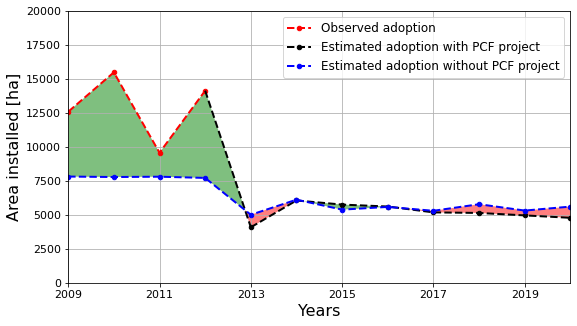

In [250]:
title = "Differential yearly SBP adoption in Portugal"
plot_differential_adoption(yearly_adoption_portugal_pred, yearly_adoption_portugal_pred_nop,
                            yearly_adoption_portugal_real, 20000, title, confidence=0.95)